# Monte Carlo Method for IBM Stock Price Prediction

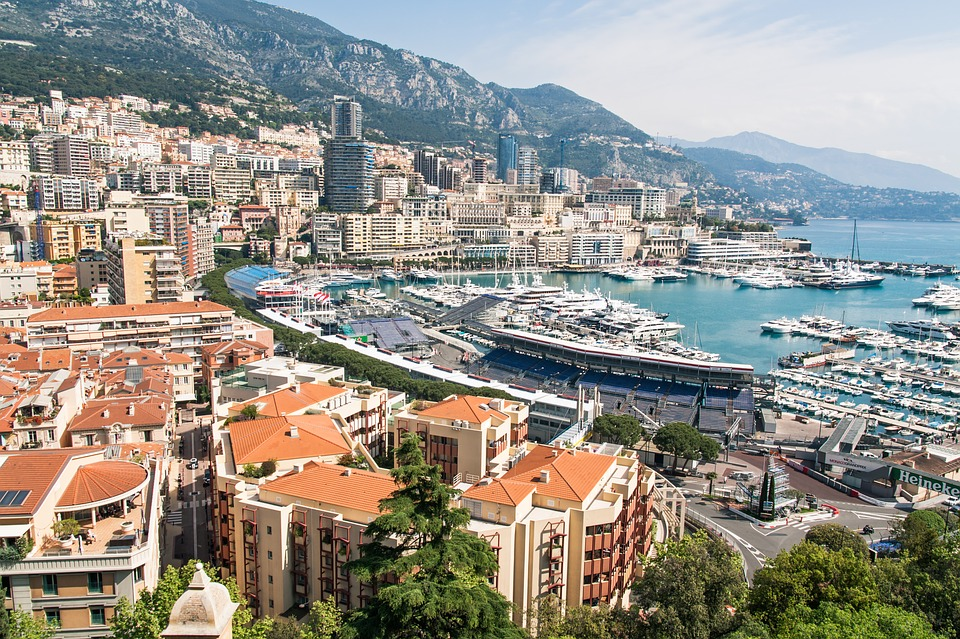

## Theoretical Foundation

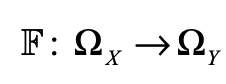

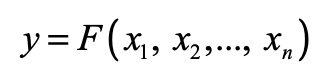

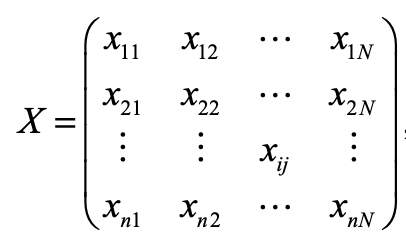

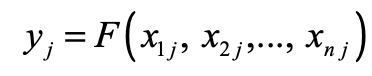

### 1. Model Creation

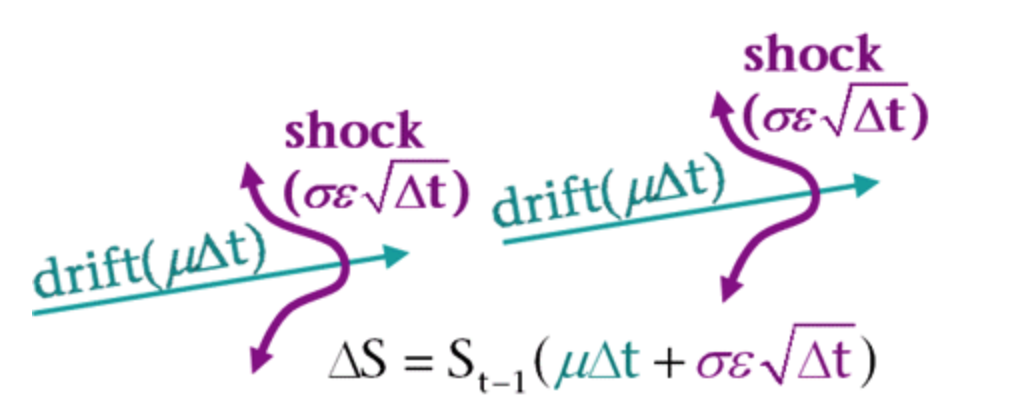

- µ - mathematical expectation of a change in the price of paper
- σ - security volatility
- ∆t - time change
- ε - random value for modeling volatility
- S - share price

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

In [6]:
apple = data.DataReader('IBM', 'yahoo',start='1/1/2000')

In [5]:
data.DataReader?

In [7]:
time_elapsed = (apple.index[-1] - apple.index[0]).days

In [8]:
price_ratio = (apple['Adj Close'][-1] / apple['Adj Close'][1])
inverse_number_of_years = 365.0 / time_elapsed
cagr = price_ratio ** inverse_number_of_years - 1

In [9]:
vol = apple['Adj Close'].pct_change().std()

In [10]:
number_of_trading_days = 252
vol = vol * math.sqrt(number_of_trading_days)

In [11]:
print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("vol (standard deviation of return : )", str(round(vol,4)))

cagr (mean returns) :  0.0255
vol (standard deviation of return : ) 0.2643


### 2. Random Value Generation

## $$ r_k = (a * r_{k-1} + c)mod(m) $$
<center> where a,c,m - certain constants: $$  r_0 <= m, 0 <=a < m, 0 <= c < m, m <= 2 $$ </center>

## $$ R_k(0,1) = {r_k \over m}$$

In [12]:
daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1

In [13]:
price_series = [apple['Adj Close'][-1]]

for drp in daily_return_percentages:
    price_series.append(price_series[-1] * drp)

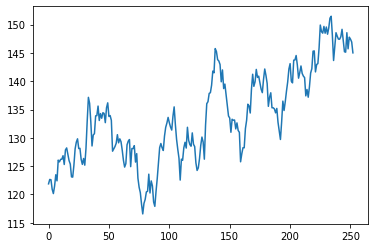

In [14]:
plt.plot(price_series)
plt.show()

### 3. Application on a large number of attempts

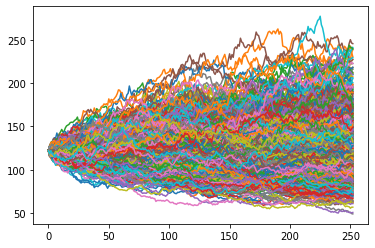

In [15]:
number_of_trials = 1000
for i in range(number_of_trials):
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [apple['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
plt.show()

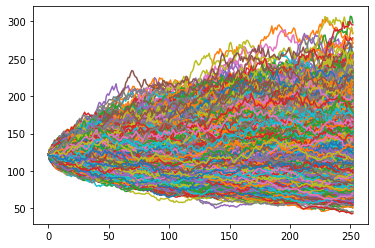

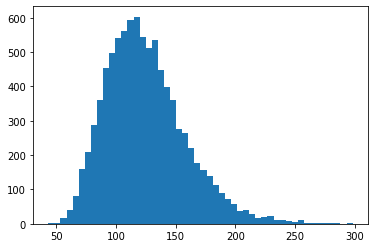

In [16]:
ending_price_points = []
larger_number_of_trials = 9001 
for i in range(larger_number_of_trials):
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, vol/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [apple['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
    
    ending_price_points.append(price_series[-1])

plt.show()

plt.hist(ending_price_points,bins=50)
plt.show()

### 4. Results Analysis

In [17]:
expected_ending_price_point = round(np.mean(ending_price_points),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))

Expected Ending Price Point :  124.77


In [18]:
population_mean = (cagr+1) * apple['Adj Close'][-1]
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")

Sample Mean :  124.77
Population Mean:  124.98
Percent Difference :  0.16 %


In [19]:
top_ten = np.percentile(ending_price_points,100-10)
bottom_ten = np.percentile(ending_price_points,10);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))

Top 10% :  169.25
Bottom 10% :  85.73


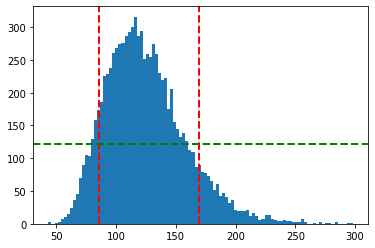

In [20]:
plt.hist(ending_price_points,bins=100)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axhline(apple['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)
plt.show()